# Convolutional Neural Network to Classify Images from CIFAR10 Database

### 1. Load CIFAR10 Dataset

CIFAR10 is one of the most famous datasets in the field of machine learning
 - It has 60,000 images
 - Very straight forward to download
 - Images dimensions are 32x32
 - Colour images
 - 10 classes

In [50]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

### 2. Data Visualization

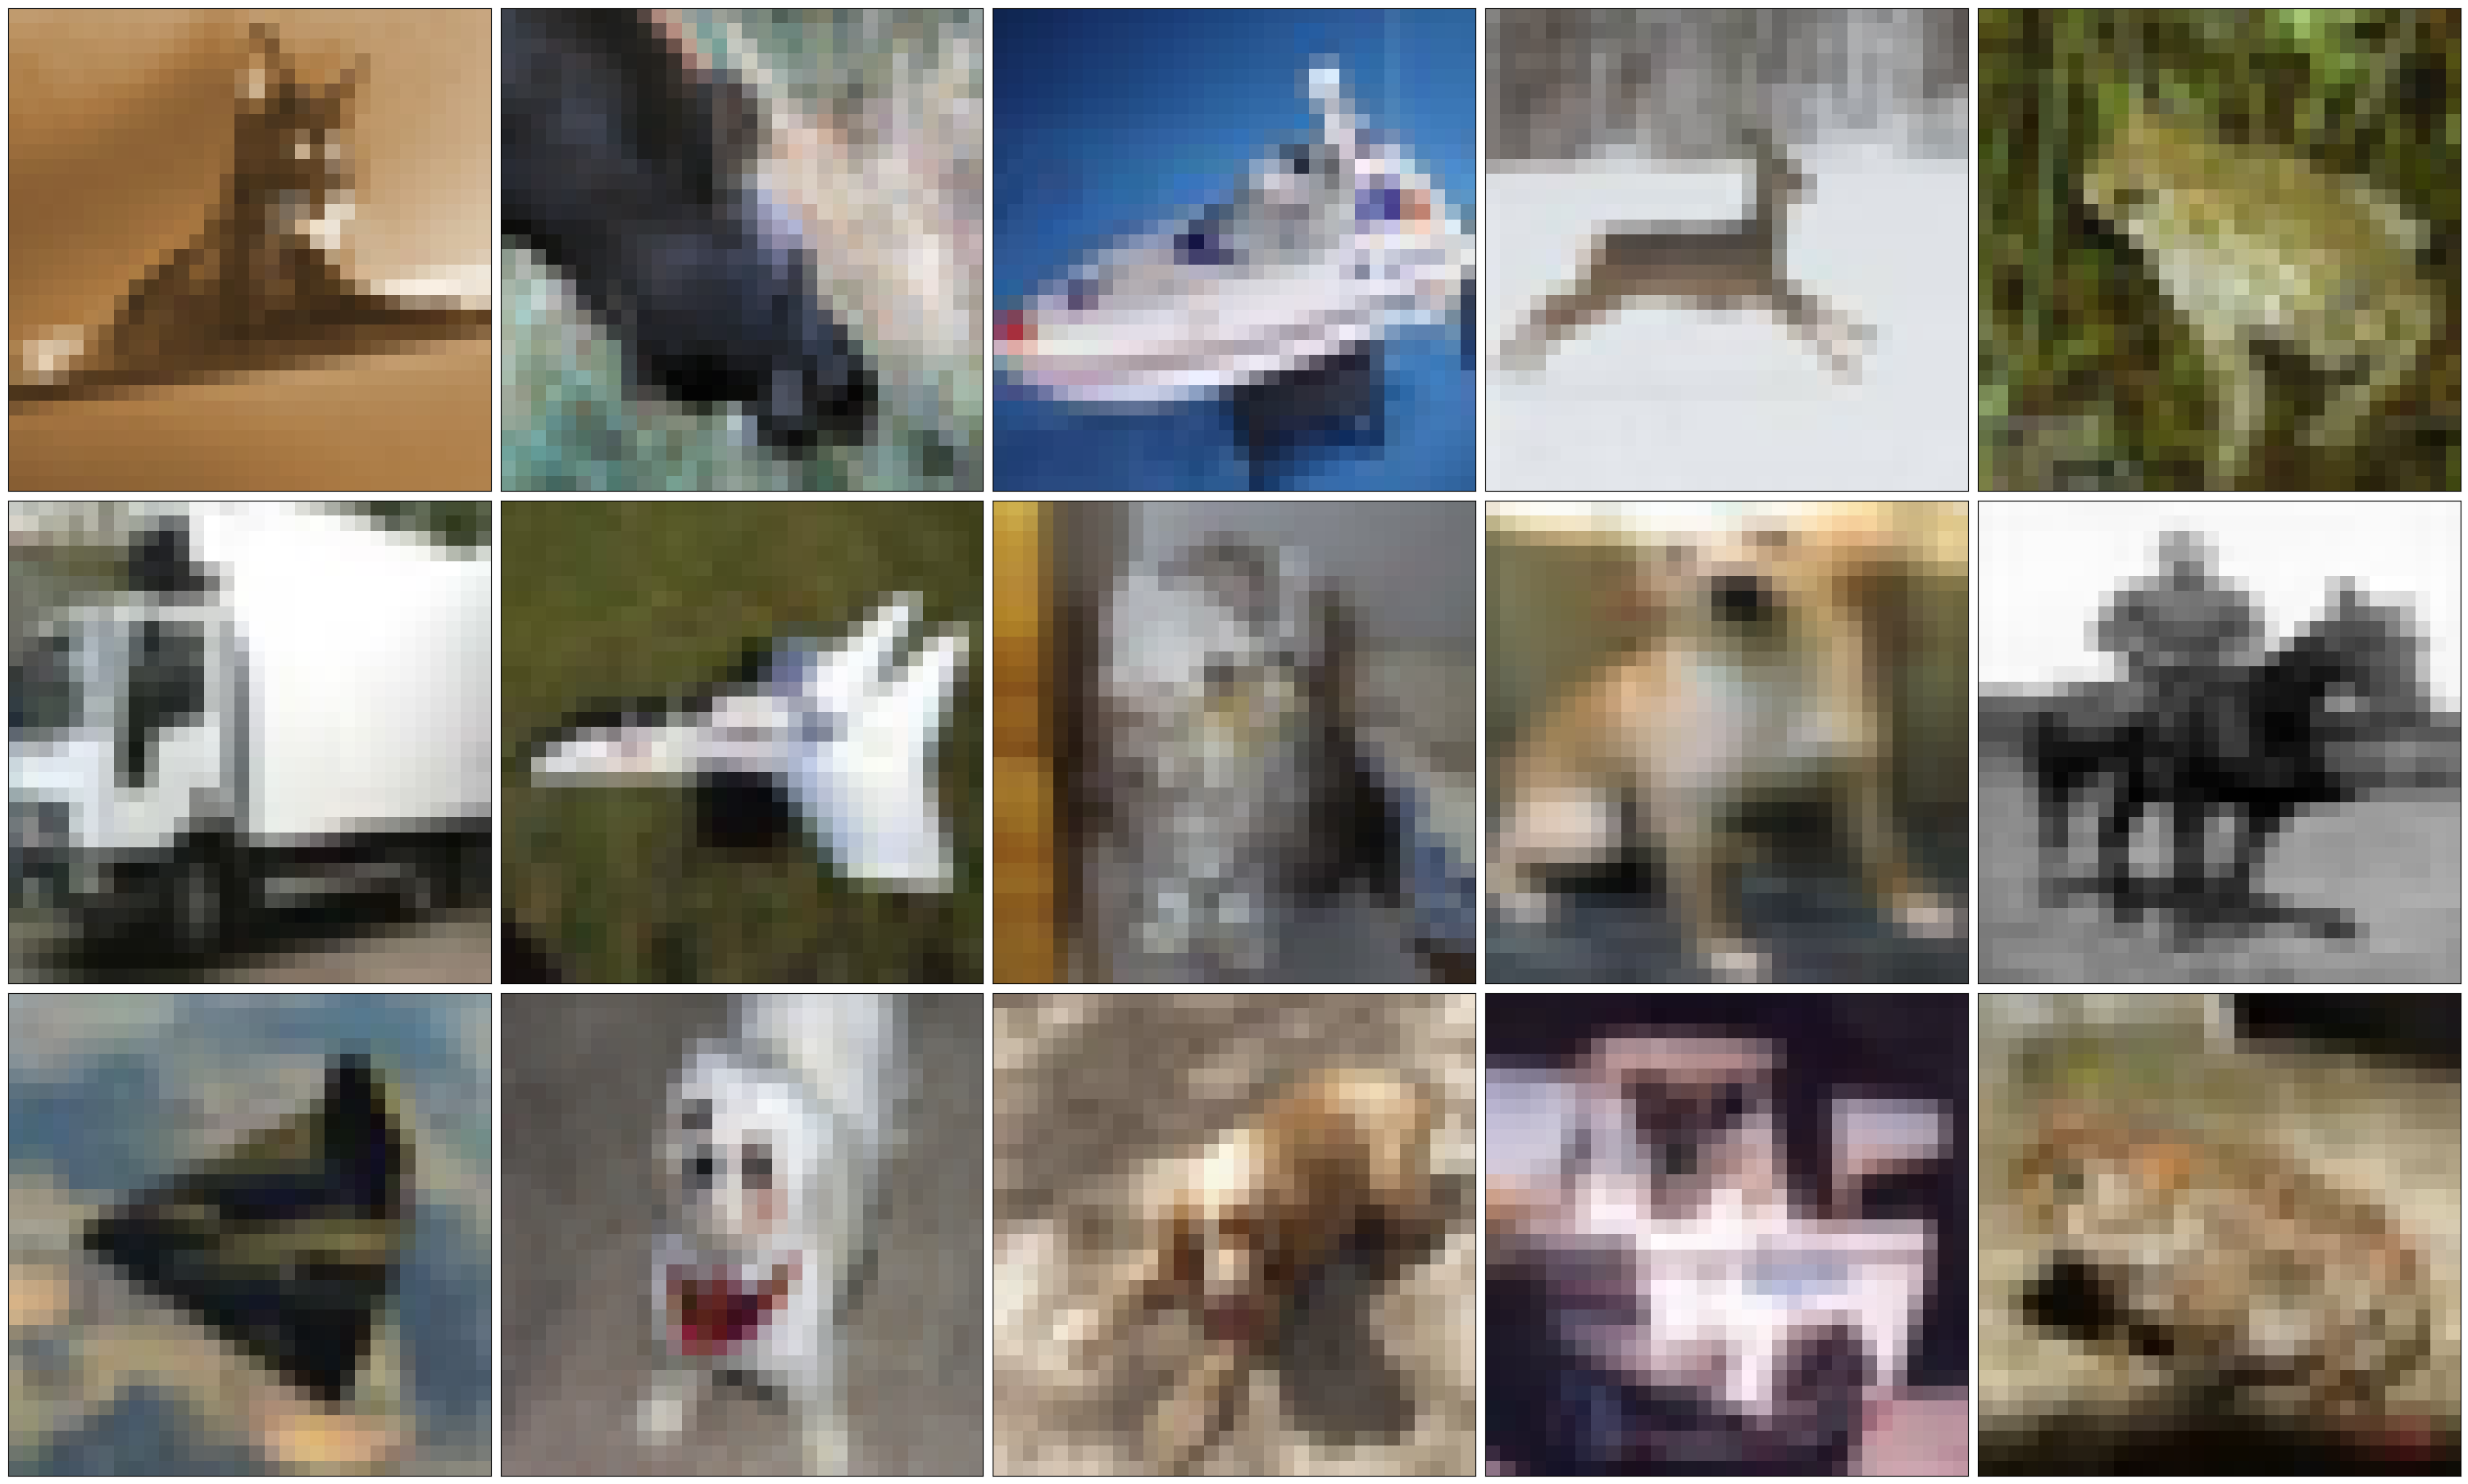

In [51]:
import numpy as np
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3,5,layout='constrained',figsize=(30,18))
for i,j in enumerate(np.random.choice(x_train.shape[0], size=15, replace=False)):
    axs.flat[i].imshow(x_train[j])
    axs.flat[i].tick_params(left=False,bottom=False,labelleft=False,labelbottom=False)
 
plt.show()

### 3. Rescale the Images

In [52]:
x_train = x_train/255.0
x_test = x_test/255.0

### 4. One-Hot Encoding for Labels

In [53]:
from tensorflow.keras.utils import to_categorical

num_classes = len(np.unique(y_train))
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

### 5. Split Data (validation data)

In [54]:
x_train, x_valid = x_train[5000:], x_train[:5000]
y_train, y_valid = y_train[5000:], y_train[:5000]

### 6. Model Architecture

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

model.add(Conv2D(filters=16, kernel_size=2, strides=1, padding='same', activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=32, kernel_size=2, strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64, kernel_size=2, strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Dropout(rate=0.3))

model.add(Flatten())

model.add(Dense(500, activation='relu'))
model.add(Dropout(rate=0.4))

model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 16)     │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 32)     │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 64)       │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 500)            │       512,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 528,054 (2.01 MB)

 Trainable params: 528,054 (2.01 MB)

 Non-trainable params: 0 (0.00 B)

### 7. Compile the Model

In [56]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

### 8. Train the Model

In [57]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='cifar10_cnn.model.weights.best.keras', verbose=1, save_best_only=True)

hist = model.fit(x_train, y_train, batch_size=32, epochs=100, validation_data=(x_valid, y_valid),
                 callbacks=[checkpointer], verbose=2, shuffle=True)

Epoch 1/100

Epoch 1: val_loss improved from inf to 1.40420, saving model to cifar10_cnn.model.weights.best.keras
1407/1407 - 15s - 10ms/step - accuracy: 0.4136 - loss: 1.6209 - val_accuracy: 0.4908 - val_loss: 1.4042
Epoch 2/100

Epoch 2: val_loss improved from 1.40420 to 1.15066, saving model to cifar10_cnn.model.weights.best.keras
1407/1407 - 14s - 10ms/step - accuracy: 0.5352 - loss: 1.2990 - val_accuracy: 0.6018 - val_loss: 1.1507
Epoch 3/100

Epoch 3: val_loss did not improve from 1.15066
1407/1407 - 14s - 10ms/step - accuracy: 0.5864 - loss: 1.1683 - val_accuracy: 0.5408 - val_loss: 1.2779
Epoch 4/100

Epoch 4: val_loss improved from 1.15066 to 1.03227, saving model to cifar10_cnn.model.weights.best.keras
1407/1407 - 15s - 10ms/step - accuracy: 0.6176 - loss: 1.0880 - val_accuracy: 0.6438 - val_loss: 1.0323
Epoch 5/100

Epoch 5: val_loss did not improve from 1.03227
1407/1407 - 15s - 11ms/step - accuracy: 0.6342 - loss: 1.0350 - val_accuracy: 0.6540 - val_loss: 1.0335
Epoch 6/10

### 9. Load Best Weights

In [58]:
model.load_weights('cifar10_cnn.model.weights.best.keras')

### 10. Accuracy on Test Set

In [59]:
score = model.evaluate(x_test, y_test, verbose=0)

print(f"Test Loss: {round(100*score[0],4)}%\nTest Accuracy: {round(100*score[1],4)}%")

Test Loss: 87.6363%
Test Accuracy: 69.27%


### 11. Visualize Some Predicitions

In [60]:
y_hat = model.predict(x_test)

cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [61]:
y_hat[0]

array([2.9947045e-03, 2.3454300e-04, 5.6491615e-03, 5.0810343e-01,
       7.7049001e-05, 2.0259182e-01, 1.5052812e-02, 1.4534269e-03,
       2.6349249e-01, 3.5057627e-04], dtype=float32)

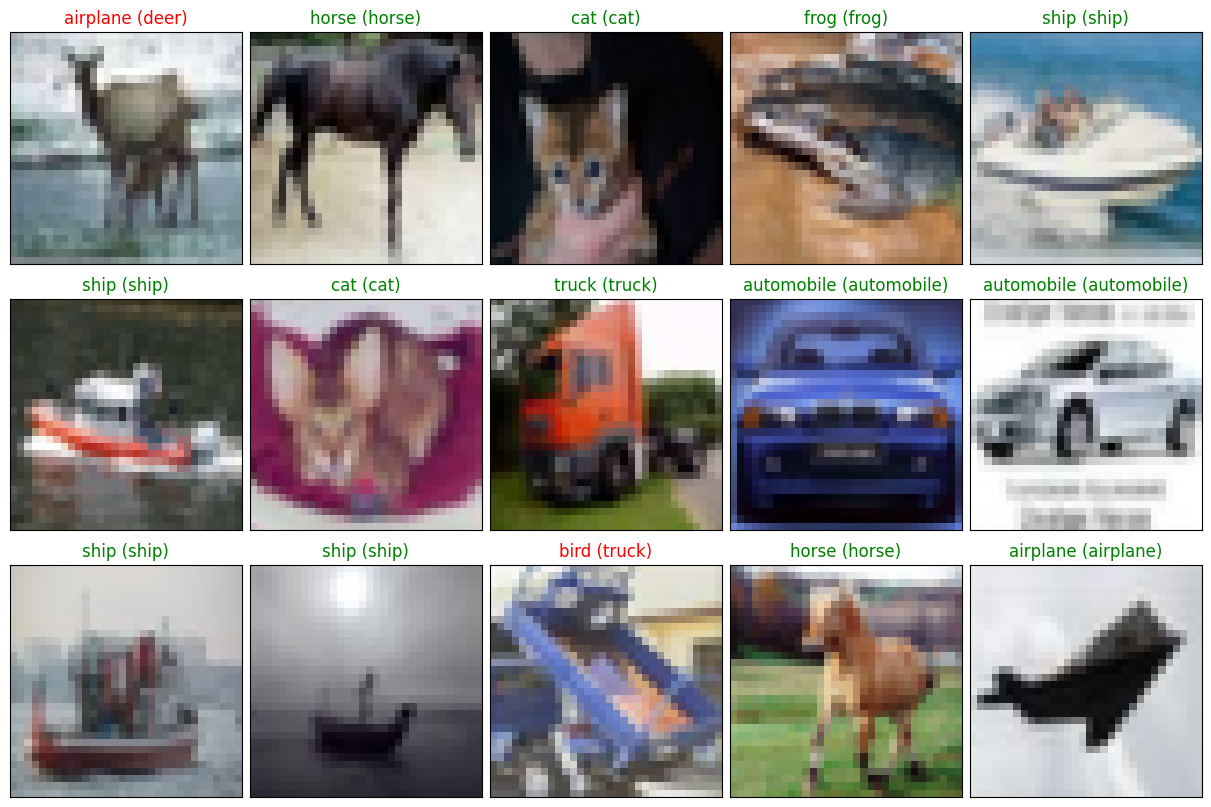

In [62]:
fig, axs = plt.subplots(3,5,layout='constrained',figsize=(12,8))
for i,j in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    axs.flat[i].imshow(x_test[j])
    axs.flat[i].tick_params(left=False,bottom=False,labelleft=False,labelbottom=False)
    pred_idx = np.argmax(y_hat[j])
    true_idx = np.argmax(y_test[j])
    axs.flat[i].set_title("{0} ({1})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                          color='green' if pred_idx == true_idx else 'red')

### 13. Accuracy Curves

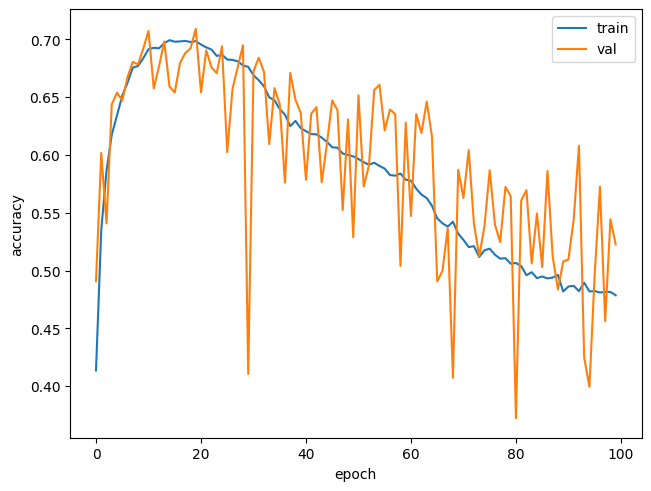

In [63]:
fig, ax = plt.subplots(1,1,layout='constrained')
ax.plot(hist.history['accuracy'], label='train')
ax.plot(hist.history['val_accuracy'], label='val')
ax.legend()
ax.set_xlabel('epoch')
ax.set_ylabel('accuracy')

plt.show()

In [69]:
type(hist.history)

dict